## Clustering: 
Categorize countries from an NGO dataset using socio-economic factors representing overall development of the country & finding countries in dire need for Aid

### Importing required libraries

In [1]:
# importing basic libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# importing scaler
from sklearn.preprocessing import StandardScaler

# importing kmeans
from sklearn.cluster import KMeans 

# importing hierarchial clustering library
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# reading dataset
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Inspecting Dataframe

In [3]:
# checking number of data points in the dataset
df.shape

(167, 10)

<b>Observation</b><br>
Since number of observations is very less so, it is not advisable to remove entries in case of being outlier/missing values.

In [4]:
# inspecting dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<b>Observations</b><br>
1. Datatypes of required above columns are float type. So, no datatype of no features to be corrected.
2. There are no missing values so, no missing value treatment is required.

In [5]:
# inspecting dataframe
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<b>Observation</b><br>
Few columns like exports, imports etc. have high upper limit values, which might need outlier treatment.

#### Converting exports,health,imports into actual values

In [6]:
# converting exports,health,imports into actual values since 
# these are percentages of gdpp
df.exports = df.exports*df.gdpp/100
df.health = df.health*df.gdpp/100
df.imports = df.imports*df.gdpp/100

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Outliers

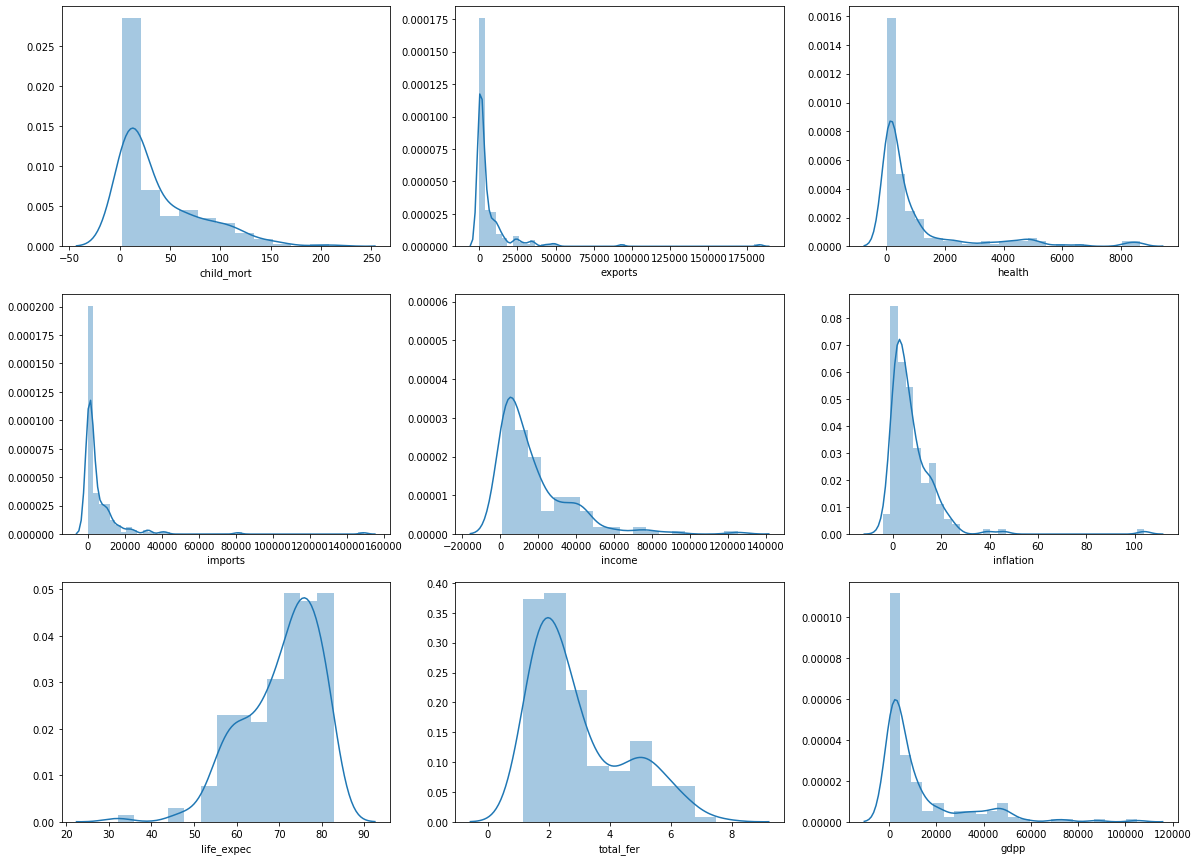

In [7]:
#### distribution plots
f = df.columns[1:]
plt.figure(figsize = [20,15])
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

<b> Observations:</b>
1. 'child_mort' has secondary data clustering near value of 100.
2. 'exports' has secondary data clustering near value of 25000.
3. 'health' has secondary data clustering near value of 5000.
4. 'imports' has secondary data clustering near value of 30000.
5. 'income' has secondary data clustering near value of 40000.
6. 'inflation' has secondary data clustering near value of 40.
7. 'life_expec' has secondary data clustering near value of 60.
8. 'total_fer' has secondary data clustering near value of 5.
9. 'gdpp' has secondary data clustering near value of 50000.

It can also be observed that data is highly skewed for certain columns like 'imports','exports','gdpp' etc. These columns might need outlier treatment depending upon requirement from the problem statement.
Since, requirement is to find countries in the most dire need of aid, so these countries will be poorest in all data features available. This means outlier treatment for different features may be different, depending upon its meaning.


In [8]:
# checking basic statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Above statistics confirm that below mentioned features have high upper range outliers:
1. exports
2. imports
3. income
4. gdpp

Upper range outliers in above two features can be treated since they will affect data for countries which do not need aid, so it will not affect the analysis.

In [9]:
# treating 'exports' feature

# finding 99th quantile
q2 = df['exports'].quantile(0.99)

# moving datapoints above 99th quantile to its 99th quantile value
df['exports'][df['exports']>=q2] = q2

In [10]:
# treating 'imports' feature

# finding 99th quantile
q2 = df['imports'].quantile(0.99)

# moving datapoints above 99th quantile to its 99th quantile value
df['imports'][df['imports']>=q2] = q2

In [11]:
# treating 'income' feature

# finding 99th quantile
q2 = df['income'].quantile(0.99)

# moving datapoints above 99th quantile to its 99th quantile value
df['income'][df['income']>=q2] = q2

In [12]:
# treating 'gdpp' feature

# finding 99th quantile
q2 = df['gdpp'].quantile(0.99)

# moving datapoints above 99th quantile to its 99th quantile value
df['gdpp'][df['gdpp']>=q2] = q2

In [13]:
# checking basic statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1056.733204,5873.135222,16857.550898,7.781832,70.555689,2.947964,12756.826347
std,40.328931,11415.308590,1801.408906,9422.700869,17957.012855,10.570704,8.893172,1.513848,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8663.600000,55371.390000,84374.000000,104.000000,82.800000,7.490000,79088.000000


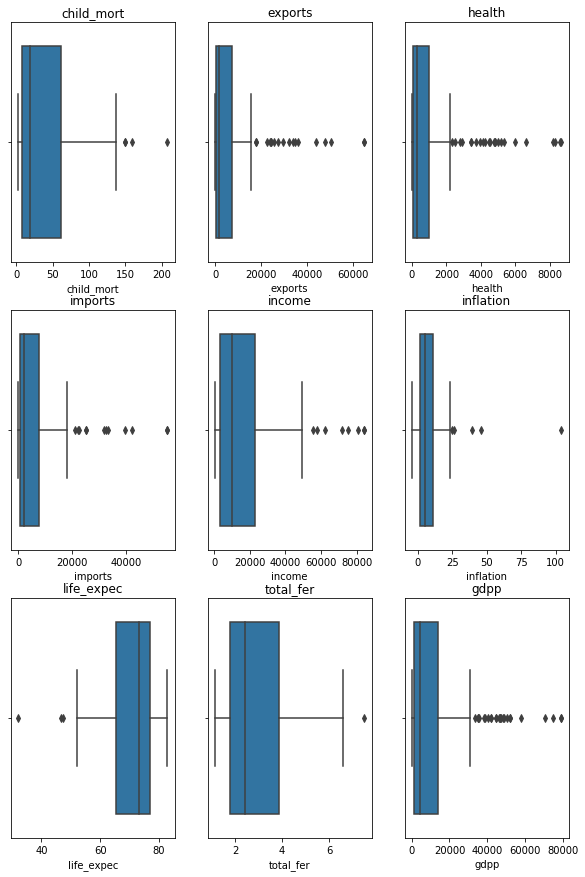

In [14]:
# checking outliers using boxplot
f = df.columns[1:]
plt.figure(figsize = [10,15])
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],data = df)
    plt.title(i[1])

<b> Observation </b> <br>
1. 'inflation' has upper range outlier but it should not be removed as it may represent country in need of aid.
2. 'life_expec' has lower range oultiers but they should not be removed as they may repesent countries in need of aid.

### Scaling

In [15]:
# scaling the data
ss = StandardScaler()
df1 = ss.fit_transform(df.drop(columns = 'country',axis = 1))
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.565040,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.439218,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.484826,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.532363,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178771,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


### Exploratory Data Analysis

Data distribution and spread has been checked through disctribution and box plot. It needs to be checked to find relation of one feature with another using scatter plot also.

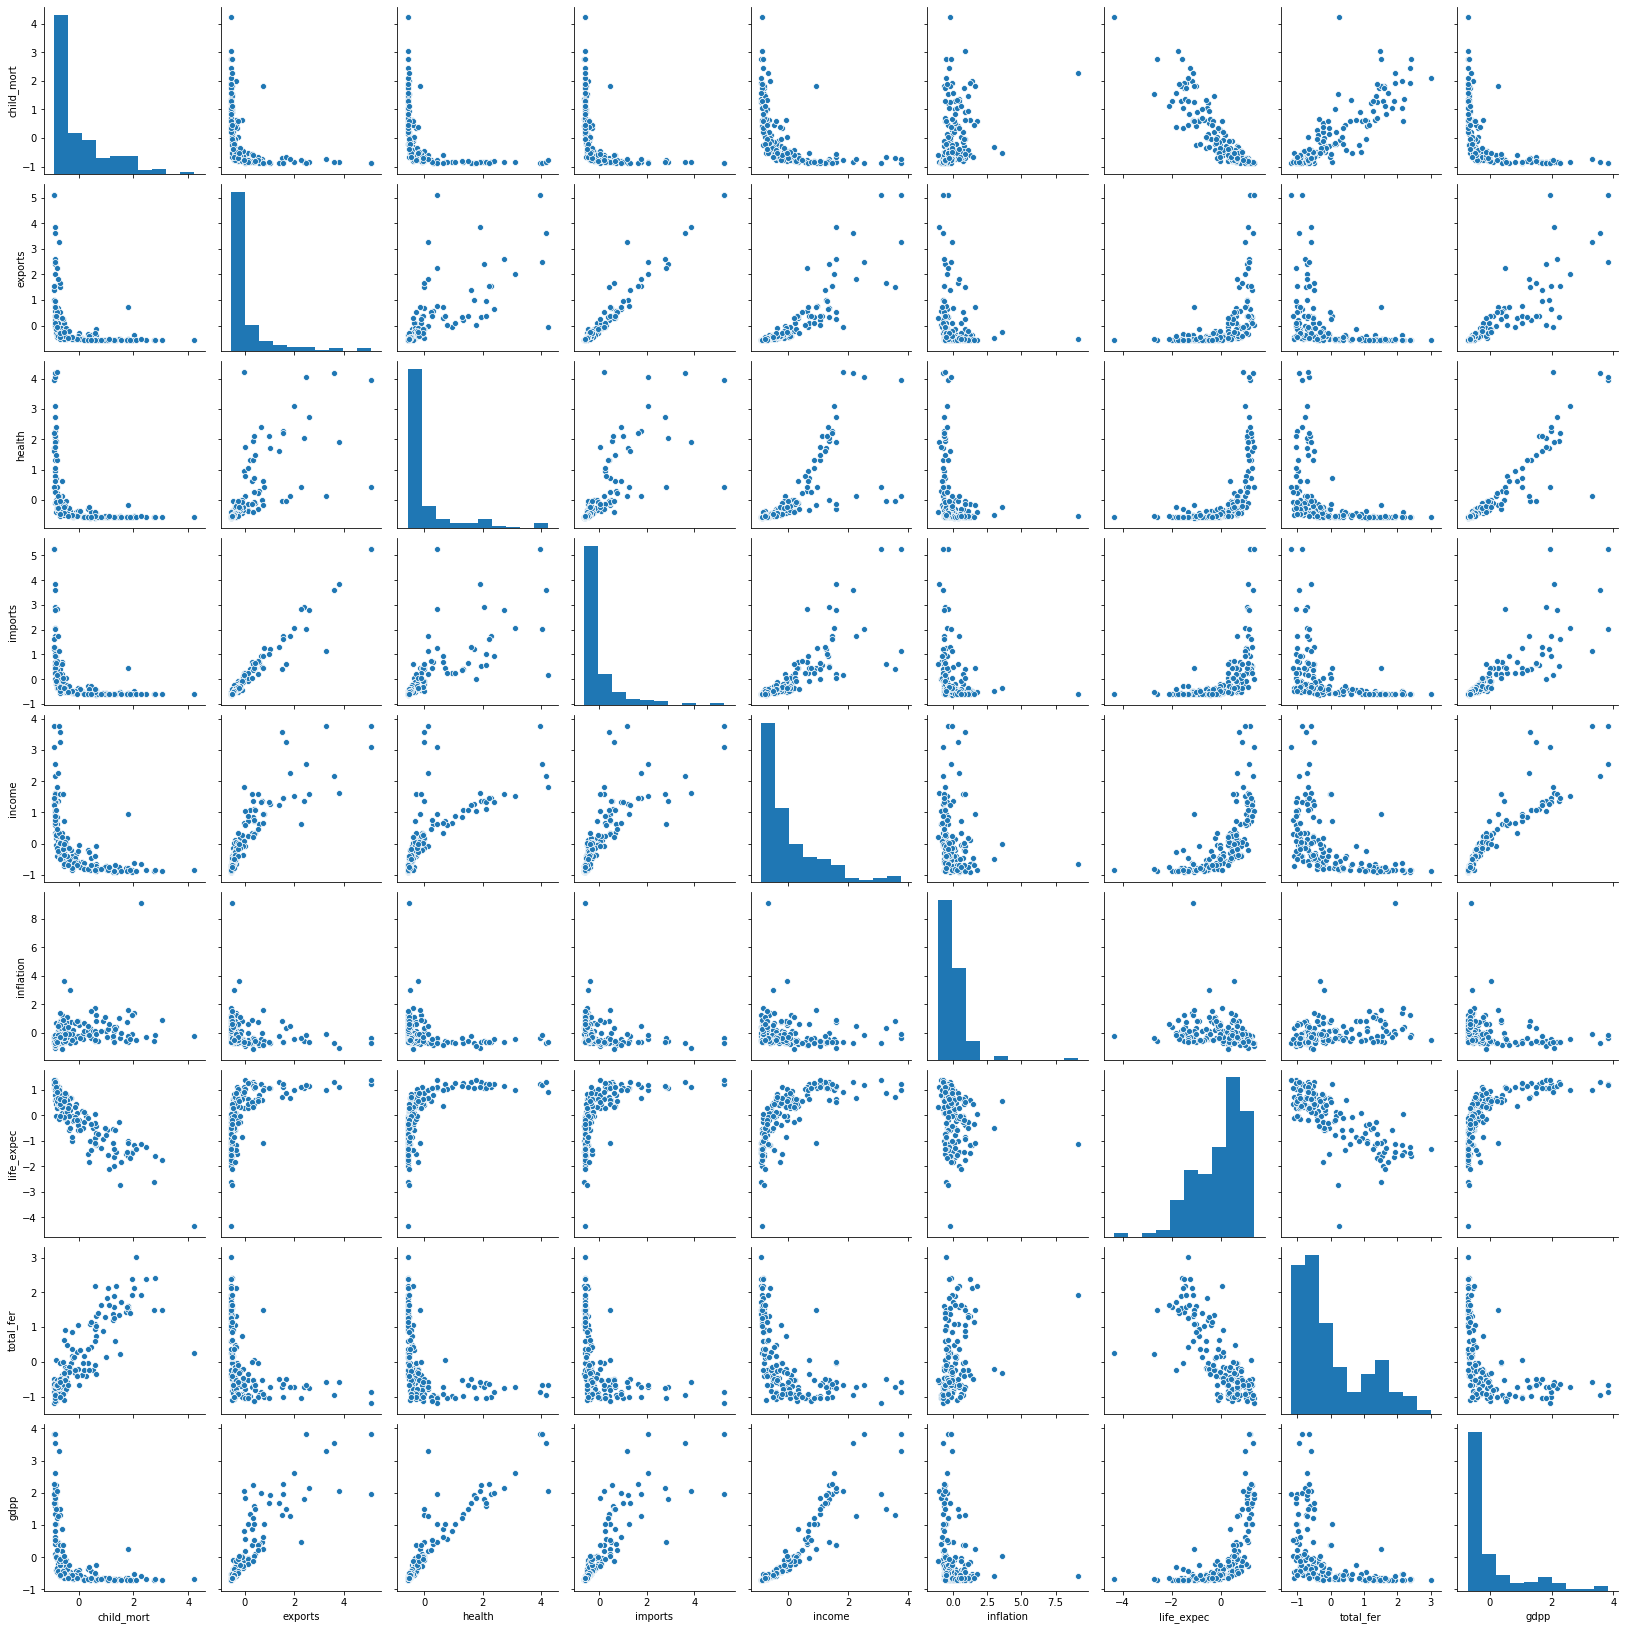

In [16]:
# plotting scatter plot for each variable with each other
sns.pairplot(df1)
plt.show()

<b>Univariate and Bivariate analysis:-<br> </b>
This is being done for the 3 important features - gdpp,child_mort and income.

#### Univariate analysis

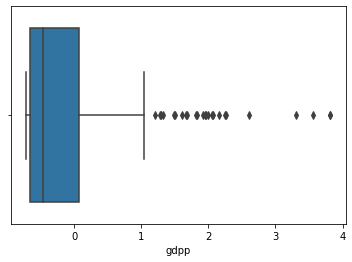

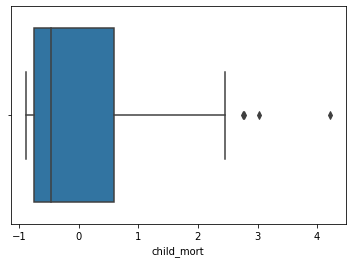

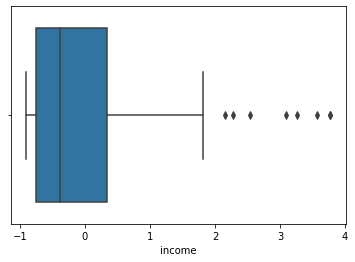

In [17]:
# plotting box plots for gdpp, child_mort and income.
sns.boxplot(x = 'gdpp',data = df1)
plt.show()
sns.boxplot(x = 'child_mort',data = df1)
plt.show()
sns.boxplot(x = 'income',data = df1)
plt.show()

Under outlier treatment, data distribution for individual features is already discussed.

#### Bivariate analysis

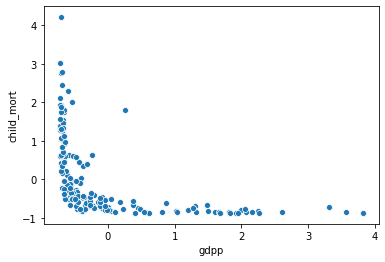

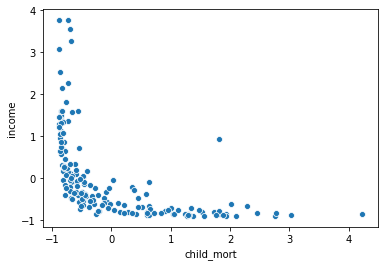

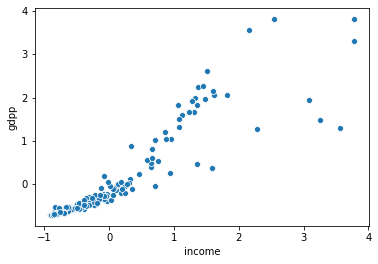

In [18]:
# plotting scatter plots for 3 features - gdpp,child_mort & income
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = df1)
plt.show()
sns.scatterplot(x = 'child_mort', y = 'income', data = df1)
plt.show()
sns.scatterplot(x = 'income', y = 'gdpp', data = df1)
plt.show()

<b> Observations </b> </br>
1. 'gdpp' vs 'child_mort' : child_mort is high for countries having low gdpp since, they donot have sufficent heath care services to prevent large scale child mortality.
2. 'child_mort' vs 'income' : Countries where child mortality is low, have high incomes. This is reasonable as richer countries will be definitely at a better position to cater child mortality as compared to poorer countries.
3. 'income' vs 'gdpp' : As income increases, gdpp also increases as each individual contributes in one way or another towards gdpp which is gdp divided into each individual of a country.

### Checking Hopkins Score for clustering ability of the dataset

In [19]:
## Hopkins

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
# checking hopkins score
hopkins(df1)

0.9255898084070493

<b> Observation </b> <br>
Since, hopkins score is above 0.85 so, dataset is able to form well segregated clusters.

### Finding optimum number of clusters

#### Using Silhouette Score

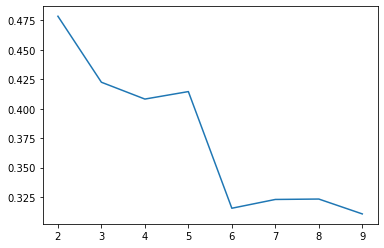

In [21]:
# checking silhouette score to find optimum number of clusters
from sklearn.metrics import silhouette_score
sil = []
for k in range(2,10):
    kmean = KMeans(n_clusters = k).fit(df1)
    sil.append([k, silhouette_score(df1, kmean.labels_)])
    
sil = pd.DataFrame(sil)
plt.plot(sil[0],sil[1])

#### Using Elbow curve


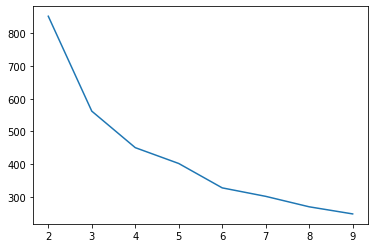

In [22]:
# using elbow curve to find optimum number of clusters
elb = []
for k in range(2,10):
    kmean = KMeans(n_clusters = k).fit(df1)
    elb.append([k,kmean.inertia_])

elb = pd.DataFrame(elb)
plt.plot(elb[0],elb[1])

plt.show()

Based on silhouette analysis and elbow curve, 5 clusters are selected for further study.

### KMeans clustering

In [23]:
# using number of clusters as 5
kmean = KMeans(n_clusters = 5,random_state = 0).fit(df1)

# adding result into df
df['cluster_KMeans'] = kmean.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_KMeans
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


#### Visualising the clusters

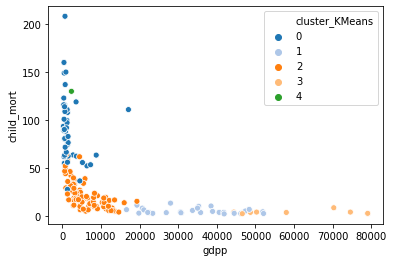

In [38]:
# plotting a scatter plot to visualise the clusters
sns.scatterplot(x = 'gdpp',y = 'child_mort', hue = 'cluster_KMeans',data = df, palette = 'tab20')
plt.show()

Countries Clusters are shown in scatter plot above and are discussed in detail under profiling.

#### Cluster profiling

In [25]:
# Cluster profiling on the basis of mean 
df[['gdpp','child_mort','income','cluster_KMeans']].groupby('cluster_KMeans').mean()

,gdpp,child_mort,income
cluster_KMeans,,,
0,1900.255319,90.793617,3870.702128
1,34186.206897,5.720690,38948.275862
2,6126.814815,22.077778,11897.407407
3,61230.666667,4.400000,59438.666667
4,2330.000000,130.000000,5150.000000


In [26]:
# Cluster profiling on the basis of median 
df[['gdpp','child_mort','income','cluster_KMeans']].groupby('cluster_KMeans').median()

,gdpp,child_mort,income
cluster_KMeans,,,
0,897.0,89.3,1850.0
1,35000.0,4.3,36200.0
2,4660.0,18.6,9960.0
3,58000.0,4.2,55500.0
4,2330.0,130.0,5150.0


<b> Observations based on mean and median cluster profiling </b> </br>
1. cluster label 0 : Low gdpp, higher medium child_mort & lower medium income [Countries may need aid]
2. cluster label 1 : Higher medium  gdpp, low child_mort , upper medium income [Upper developing countries ; may not need aid]
3. cluster label 2 : Lower medium gdpp, lower medium child_mort , medium income [Upper developing countries ; may not need aid]
4. cluster label 3 : High gdpp, low child_mort , high income [Developed countries ; definitely will not need aid]
5. cluster label 4 : Lower medium gdpp, high child_mort , low medium income [Country may need aid]

## Countries in need of aid according to KMeans Clustering:

In [27]:
# top 5 countries in most dire need aid based on gdpp after clustering
df[df['cluster_KMeans'].isin([0,4])].sort_values(by = 'gdpp', ascending = True).head(10)['country']

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

In [28]:
# top 5 countries in most dire need aid based on child_mort after clustering
df[df['cluster_KMeans'].isin([0,4])].sort_values(by = 'child_mort', ascending = False).head(10)['country']

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
25                 Burkina Faso
37             Congo, Dem. Rep.
Name: country, dtype: object

In [29]:
# top 5 countries in most dire need aid based on income after clustering
df[df['cluster_KMeans'].isin([0,4])].sort_values(by = 'income', ascending = True).head(10)['country']

37             Congo, Dem. Rep.
88                      Liberia
26                      Burundi
112                       Niger
31     Central African Republic
106                  Mozambique
94                       Malawi
63                       Guinea
150                        Togo
132                Sierra Leone
Name: country, dtype: object

#### Top 5 Countries in dire need of aid as per KMeans based on sorting on the basis of 'gdpp', 'child_mort' & 'income'.

1. Burundi
2. Central African Republic
3. Niger
4. Sierra Leone
5. Liberia

Note: 
Above countries have been selected out of top 10 countries sorted for 'gdpp','child_mort' & 'income' and the list can be subjective on the basis of importance given to 'gdpp','child_mort' or 'income'. 

### Hierarchial Clustering

#### single linkage

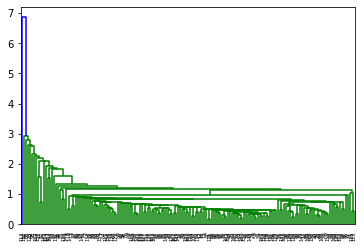

In [30]:
# using single linkage for hierarcial clustering
mergings = linkage(df1,method = 'single',metric = 'euclidean')
dendrogram(mergings)
plt.show()

<b> Observation </b> <br>
1. Since, single linkage uses smallest distance b/w two points as the distance between two clusters. So, it produces large number of clusters which are generally not interpretable.

#### Complete linkage

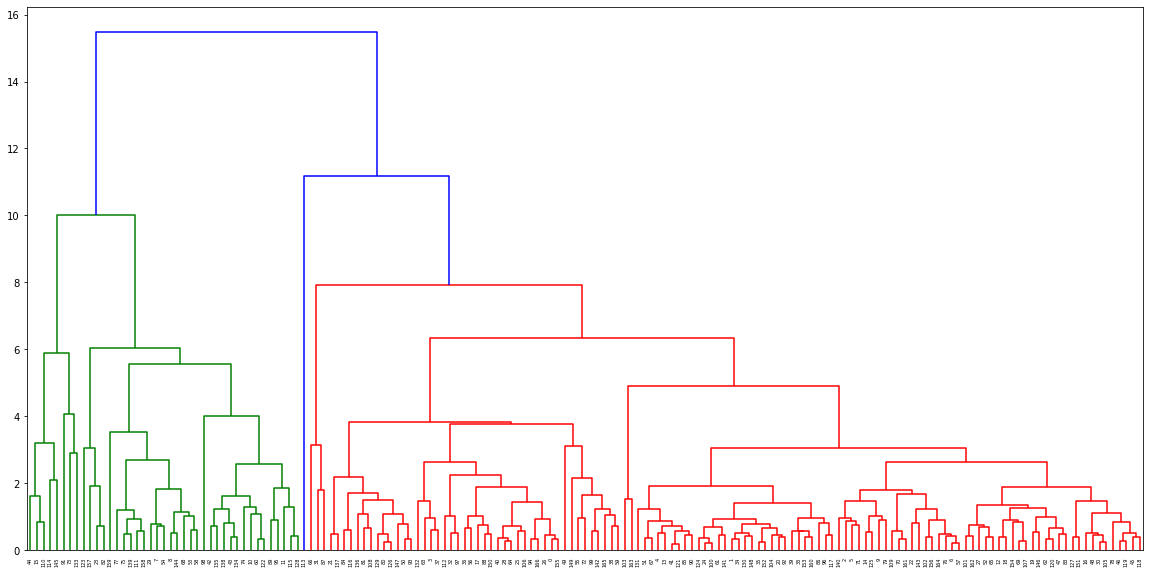

In [31]:
# using complete linkage for hierarcial clustering
mergings = linkage(df1,method = 'complete', metric = 'euclidean')
plt.figure(figsize = [20,10])
dendrogram(mergings)
plt.show()

In [32]:
# using number of clusters as 5 based on silhouette analysis and elbow curve 

# checking shape of cut tree output
cut_tree(mergings, n_clusters = 5)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [33]:
# reshaping cut_tree output into single array
cluster_labels = cut_tree(mergings, n_clusters = 5).reshape(-1, )

# adding result into df
df['cluster_Hierarchy'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_KMeans,cluster_Hierarchy
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0


### Visualising the clusters

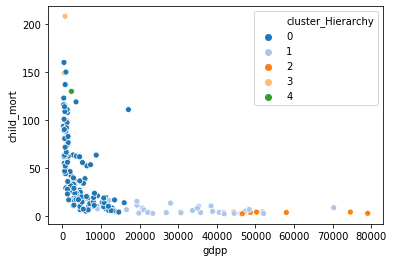

In [34]:
g = sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_Hierarchy', data = df, palette = 'tab20')
plt.show()

Countries Clusters are shown in scatter plot above and are discussed in detail under profiling.

### Cluster Profiling

In [35]:
# Cluster profiling on the basis of mean
df[['gdpp','child_mort','income','cluster_Hierarchy']].groupby(by = 'cluster_Hierarchy').mean()

,gdpp,child_mort,income
cluster_Hierarchy,,,
0,4449.475410,45.563115,8563.483607
1,33399.090909,6.518182,39696.181818
2,60097.000000,3.825000,56321.750000
3,759.333333,152.233333,1589.333333
4,2330.000000,130.000000,5150.000000


In [36]:
# Cluster profiling on the basis of median
df[['gdpp','child_mort','income','cluster_Hierarchy']].groupby(by = 'cluster_Hierarchy').median()

,gdpp,child_mort,income
cluster_Hierarchy,,,
0,3165.0,30.75,7010.0
1,33700.0,4.80,36200.0
2,54150.0,4.15,50600.0
3,662.0,149.00,1500.0
4,2330.0,130.00,5150.0


<b> Observations based on mean and median cluster profiling </b> </br>
1. cluster label 0 : Lower medium gdpp, lower medium child_mort & income [Countries may not need aid]
2. cluster label 1 : Higher medium  gdpp, low child_mort , upper medium income [Upper developing countries ; may not need aid]
3. cluster label 2 : Lower medium gdpp, lower medium child_mort , medium income [Upper developing countries ; may not need aid]
4. cluster label 3 : Low gdpp, high child_mort , low income [Lower developing countries ; definitely will need aid]
5. cluster label 4 : Lower medium gdpp, high child_mort , low medium income [Country may need aid]

## Countries in need of aid according to Hierarchial Clustering:

In [37]:
# top countries in most dire need aid based on gdpp after clustering
df[df['cluster_Hierarchy'].isin([3,4])].sort_values(by = 'gdpp', ascending = True).head()['country']

31     Central African Republic
66                        Haiti
87                      Lesotho
113                     Nigeria
Name: country, dtype: object

<b> Top Countries in dire need of aid as per Hierrarchial clustering </b> <br>
1. Central African Republic
2. Haiti
3. Lesotho
4. Nigeria

Since, there is a requirement to report at least 5 countries, so , going forward with KMeans clustering for results.

<b> Reason to select 5 number of clusters </b> <br>
There is an equal/more possibility of selecting number of clusters as 3, however, since most students might select number of clusters as 3, so , to get a different view of clustering, number of clusters for this assignment is selected to be 5.

<b> Note: </b> One of the clusters formed has only one country. It may not seem to be logical but if a country(Nigeria) is quite different from other countries in all features, then it may be sometimes a good approach to keep such countries under separate clusters.[Number of clusters may have been reduced to 4 or 3 to merge Nigeria with other countries, but current clustering seemed more logical]

### Top 5 countries in dire need of aid selected based on KMeans algorithm & number of clusters as 5:

1. Burundi
2. Central African Republic
3. Niger
4. Sierra Leone
5. Liberia

## If number of clusters selected are 3

### KMeans

In [46]:
# intiating kmeans and fitting to scaled dataset
kmeans = KMeans(n_clusters = 3).fit(df1)

# Copying initial dataset
df2 = df.copy()
df2.drop(columns = ['cluster_Hierarchy'],axis = 1, inplace = True)

# Adding labels to df2
df2['cluster_KMeans'] = kmeans.labels_

# top 5 entries
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_KMeans
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [49]:
# cluster profiling
df2[['gdpp','child_mort','income','cluster_KMeans']].groupby('cluster_KMeans').mean()

,gdpp,child_mort,income
cluster_KMeans,,,
0,8226.869565,20.177174,14169.456522
1,47476.888889,5.092593,49057.333333
2,1909.208333,91.610417,3897.354167


Based on cluster profiling, cluster having label 2 seems to be in the most dire need of aid since it has lowest gdpp, income and highest child_mort.

In [52]:
# finding the countries in need of aid through kmeans
df2[df2['cluster_KMeans'] == 2]['country']

# top 5 countries can be found out by sorting dataset on the basis of gdpp/income/child_mort etc. 

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

### Hierarchial Clustering

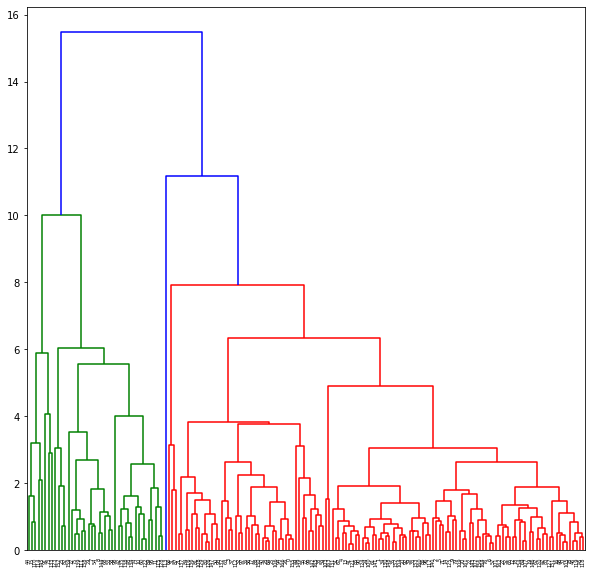

In [55]:
# Using complete linkage for hierarchial clustering
mergings = linkage(df1, method = 'complete' , metric = 'euclidean')

# increasing plot size
plt.figure(figsize = [10,10])

# creating dendrogram 
dendrogram(mergings)
plt.show()

In [57]:
# cut-tree
cut_tree(mergings, n_clusters = 3)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [58]:
# reshaping cut_tree output into single array
cluster_labels = cut_tree(mergings, n_clusters = 3).reshape(-1, )

# adding result into df2
df2['cluster_Hierarchy'] = cluster_labels
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_KMeans,cluster_Hierarchy
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


In [63]:
# cluster profiling
df2[['gdpp','child_mort','income','cluster_Hierarchy']].groupby(by = 'cluster_Hierarchy').mean()

,gdpp,child_mort,income
cluster_Hierarchy,,,
0,4360.912000,48.123200,8396.104000
1,38608.439024,5.992683,42940.195122
2,2330.000000,130.000000,5150.000000


In [64]:
# checking the cluster which needs aid the most
df2[df2['cluster_Hierarchy'] == 2]

# Since, this cluster has only one country, so, cluster having label 0 can also be reported with 
#'Nigeria' amoung countries needing aid the most.

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_KMeans,cluster_Hierarchy
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,2,2


In [67]:
# checking the cluster which needs aid the most
df2[df2['cluster_Hierarchy'].isin([2,0])]['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 126, dtype: object

### Comparing KMeans and Hierarchial clustering for number of clusters as 3

Since, Hierarchial clustering created a new cluster for 'Nigeria', so, almost all countries got clustered into 2 clusters only, which is not a very good clustering from business point of view.
So, it is better to go with KMeans clustering in the case with number of clusters having 3 also.

Business aspect : Business decision making generally needs a few options to go with. Even if silhouette score and elbow curve point out that there are 2 clusters in the dataset,  atleast 3 clusters are generally required to ease the process of business decision making. However, the number of clusters should not be more than 10 ,since, it can be very difficult for the organization head to take any decision based on studying 10 clustering options.